In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch


In [16]:
df = pd.read_csv('segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [17]:
# Remove irelevent columns
df.drop('ID', inplace = True, axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [18]:
# Check empty values
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


C:\Users\user\AppData\Local\Temp\ipykernel_9648\4227844110.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,k)
C:\Users\user\AppData\Local\Temp\ipykernel_9648\4227844110.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\user\AppData\Local\Temp\ipykernel_9648\4227844110.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an

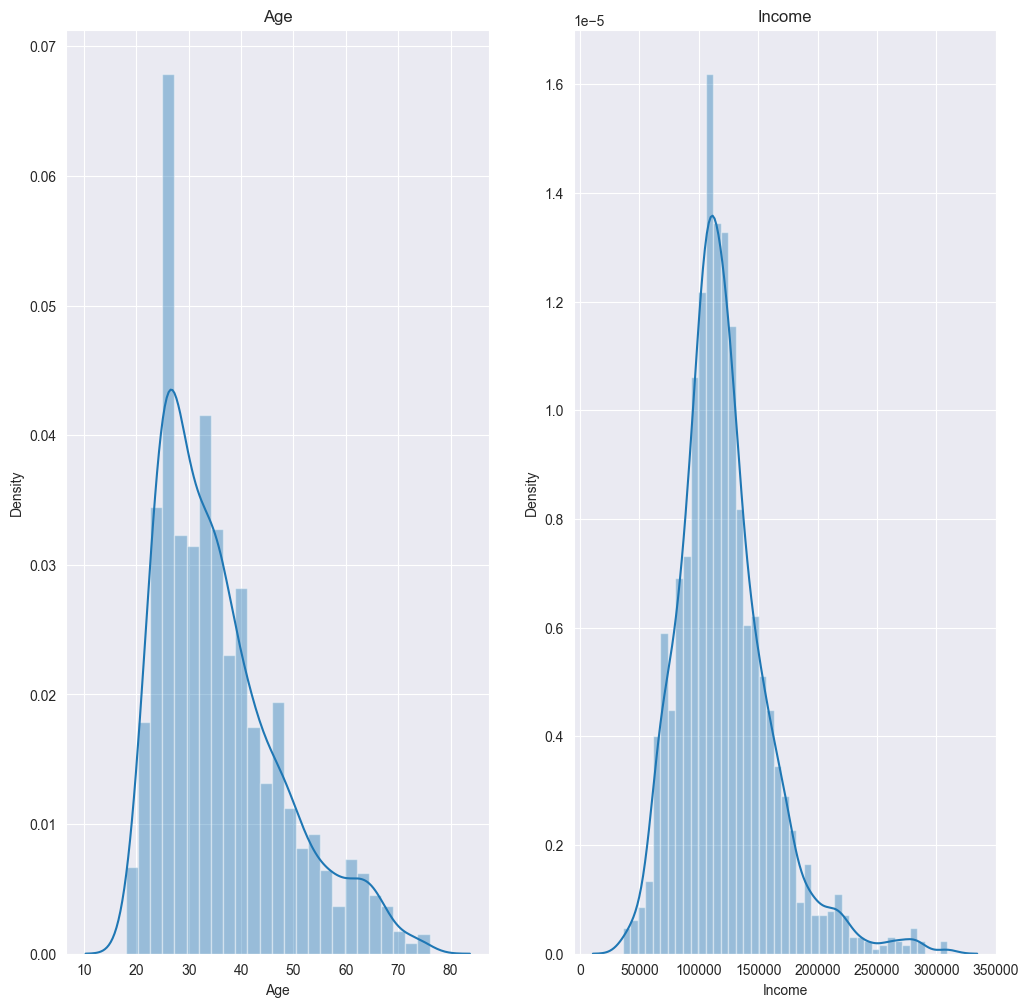

In [20]:
k=1
plt.figure(figsize=(12,12))
plt.title("Num Columns")
for i in df.loc[:,['Age','Income']]:
    plt.subplot(1,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k=k+1

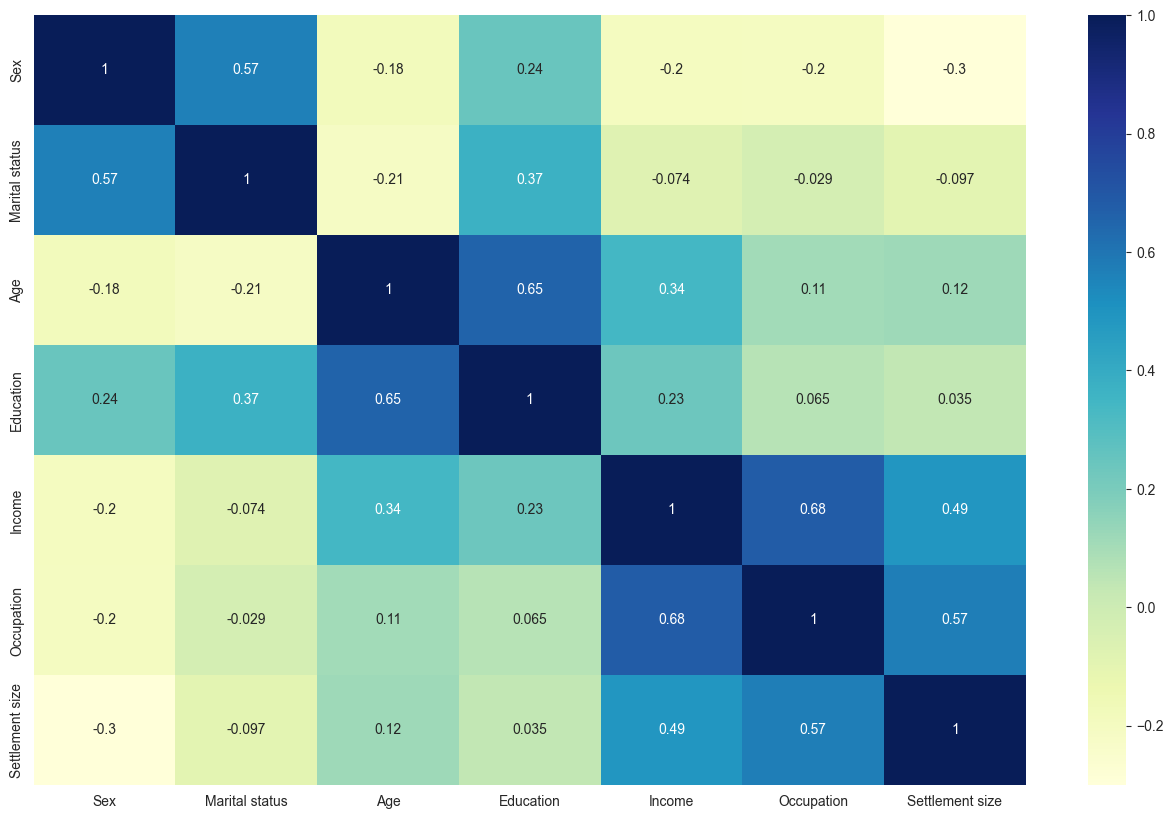

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

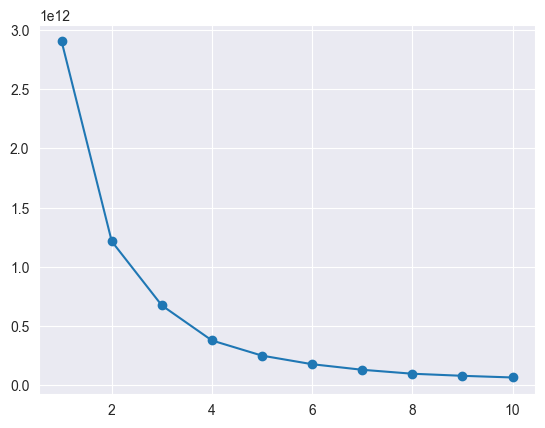

In [22]:
# Apply the "Elbow Method" to find the optimal clusters number
interia = []
for k in range(1, 11):
    km = KMeans(k, n_init=10)
    km.fit(df)
    interia.append(km.inertia_)
plt.plot(range(1, 11), interia, marker='o')

Silhouette score: 0.513


<Axes: xlabel='Age', ylabel='Income'>

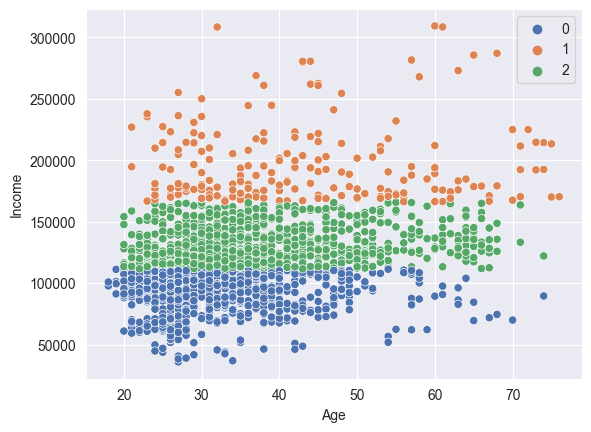

In [23]:

results = pd.DataFrame()
Name = []
Score = []

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df)
score = silhouette_score(df, kmeans.labels_)
print(f"Silhouette score: {score:0.3f}")
Name.append('KMeans')
Score.append(score)
sns.scatterplot(x=df.Age, y=df.Income, hue=kmeans.labels_, palette='deep')

Silhouette score: 0.529


<Axes: xlabel='Age', ylabel='Income'>

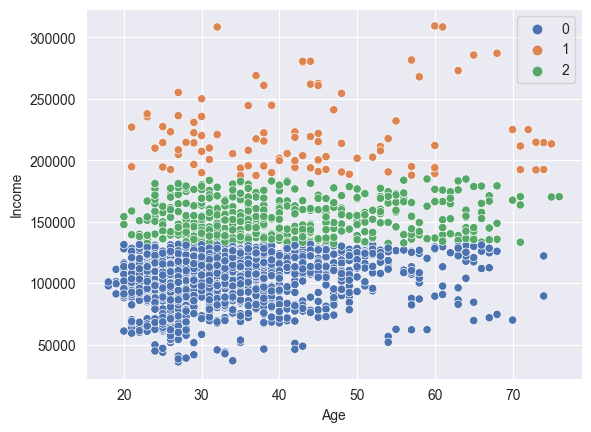

In [24]:
# Visualise the three clusters using Birch Clustering 
BCH = Birch() 
BCH.fit(df)
score = silhouette_score(df, BCH.labels_)
print(f"Silhouette score: {score:0.3f}")
Name.append('Birch Clustering')
Score.append(score)
sns.scatterplot(x=df.Age, y=df.Income, hue=BCH.labels_, palette='deep')

Silhouette score: 0.653


<Axes: xlabel='Age', ylabel='Income'>

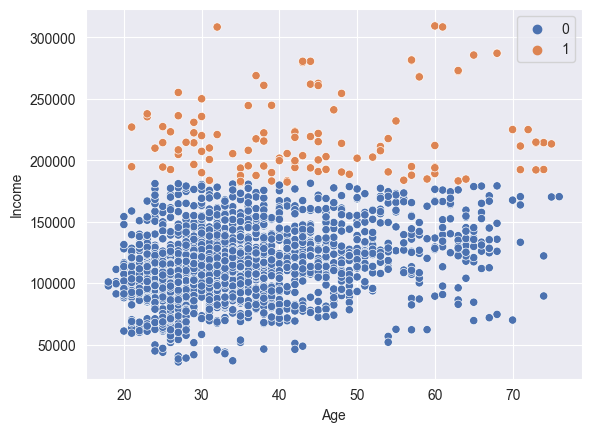

In [25]:
# Visualise the three clusters using Mean Shift 
MS = MeanShift() 
MS.fit(df)
score = silhouette_score(df, MS.labels_)
print(f"Silhouette score: {score:0.3f}")
Name.append('Mean Shift')
Score.append(score)
sns.scatterplot(x=df.Age, y=df.Income, hue=MS.labels_, palette='deep')

Silhouette score: 0.529


<Axes: xlabel='Age', ylabel='Income'>

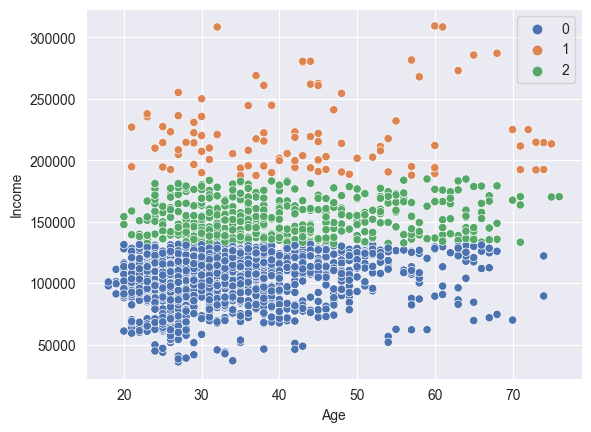

In [26]:
# Visualise the three clusters using Birch Clustering 
BCH = Birch() 
BCH.fit(df)
score = silhouette_score(df, BCH.labels_)
print(f"Silhouette score: {score:0.3f}")
Name.append('Birch Clustering')
Score.append(score)
sns.scatterplot(x=df.Age, y=df.Income, hue=BCH.labels_, palette='deep')

In [27]:
# Showing the results 
results['Name'] = Name
results['Score'] = Score
results

,Name,Score
0,KMeans,0.512539
1,Birch Clustering,0.528529
2,Mean Shift,0.653212
3,Birch Clustering,0.528529
